In [1]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [2]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [3]:
tfdif = TfidfVectorizer()
tfdif.fit(X_train['clean_text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [4]:
X_train_tfidf = tfdif.transform(X_train['clean_text'])
X_test_tfidf = tfdif.transform(X_test['clean_text'])

In [5]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [6]:
from xgboost import XGBClassifier

In [9]:
xgb = XGBClassifier()

In [10]:
model = xgb.fit(X_train_tfidf,y_train)

In [15]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
ypred = model.predict(X_test_tfidf)
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)
accuracy = accuracy_score(y_test,ypred)
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}")

Precision: 0.9831932773109243, Recall: 0.823943661971831, Accuracy: 0.9757847533632287


In [12]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
XGBClassifier()

In [29]:
params = {
    'n_estimators':range(50,500,50),
    #'max_depth':range(8,21,2),
    'learning_rate':[0.001,0.01,0.1,0.2,0.002,0.02,0.5],
    'colsample_bytree': np.linspace(0.1,1,10),
    'colsample_bynode': np.linspace(0.1,1,10),
    'colsample_bylevel': np.linspace(0.1,1,10),
    'subsample': np.linspace(0.1,1,10)
}

In [30]:
np.linspace(0.1,1,10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [31]:
XbgCls = XGBClassifier()
randxgb = RandomizedSearchCV(XbgCls,params,
    n_iter=10,
    n_jobs=-1,
    iid='warn',
    refit=True,
    cv=5,
    verbose=2)

In [32]:
randxg = randxgb.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   59.4s finished


In [34]:
randxg.best_params_

{'subsample': 0.9,
 'n_estimators': 250,
 'max_depth': 18,
 'learning_rate': 0.2,
 'colsample_bytree': 0.30000000000000004,
 'colsample_bynode': 0.2,
 'colsample_bylevel': 1.0}

In [35]:
XbgCls_1 = XGBClassifier(**{'subsample': 0.9,
 'n_estimators': 250,
 'max_depth': 18,
 'learning_rate': 0.2,
 'colsample_bytree': 0.30000000000000004,
 'colsample_bynode': 0.2,
 'colsample_bylevel': 1.0})
model_1 = XbgCls_1.fit(X_train_tfidf,y_train)
ypred = model_1.predict(X_test_tfidf)
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)
accuracy = accuracy_score(y_test,ypred)
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}")

Precision: 1.0, Recall: 0.8098591549295775, Accuracy: 0.9757847533632287


In [48]:
params = {
    'n_estimators':range(200,300,25),
    #'max_depth':range(8,21,2),
    'learning_rate':[0.001,0.01,0.1,0.2,0.002,0.02,0.5],
    'colsample_bytree': np.linspace(0.1,1,10)[:4],
    'colsample_bynode': np.linspace(0.1,1,10)[:4],
    'colsample_bylevel': np.linspace(0.1,1,10)[6:],
    'subsample': np.linspace(0.1,1,10)[6:]
}

In [49]:
xgbclass = XGBClassifier()
grid = RandomizedSearchCV(xgbclass,params,
    n_iter=10,
    n_jobs=-1,
    cv=5,
    verbose=2)
gridModel = grid.fit(X_train_tfidf,y_train)
gridModel.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.9s finished


{'subsample': 1.0,
 'n_estimators': 250,
 'learning_rate': 0.1,
 'colsample_bytree': 0.2,
 'colsample_bynode': 0.1,
 'colsample_bylevel': 0.7000000000000001}

In [50]:
XbgCls_1 = XGBClassifier(**{'subsample': 1.0,
 'n_estimators': 250,
 'learning_rate': 0.1,
 'colsample_bytree': 0.2,
 'colsample_bynode': 0.1,
 'colsample_bylevel': 0.7000000000000001})
model_1 = XbgCls_1.fit(X_train_tfidf,y_train)
ypred = model_1.predict(X_test_tfidf)
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)
accuracy = accuracy_score(y_test,ypred)
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}")

Precision: 1.0, Recall: 0.8098591549295775, Accuracy: 0.9757847533632287


In [53]:
params = {
    'n_estimators':range(200,300,50),
    #'max_depth':range(8,21,2),
    'learning_rate':[0.001,0.01,0.1,0.2,0.002,0.02],
    'colsample_bytree': [0.1,0.2,0.3],
    'colsample_bynode': [0.1,0.2,0.3],
    'colsample_bylevel': [0.1,0.2,0.3],
    'subsample': [0.8,0.9,1]
}

In [54]:
xgbclass = XGBClassifier()
grid = GridSearchCV(xgbclass,params,
    n_jobs=-1,
    cv=5,
    verbose=2)
gridModel = grid.fit(X_train_tfidf,y_train)
gridModel.best_params_

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed: 16.5min finished


{'colsample_bylevel': 0.1,
 'colsample_bynode': 0.3,
 'colsample_bytree': 0.3,
 'learning_rate': 0.2,
 'n_estimators': 250,
 'subsample': 1}

#### Final Model

In [63]:
XbgCls_1 = XGBClassifier(**{'colsample_bylevel': 0.7,
 'colsample_bynode': 0.2,
 'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'n_estimators': 250,
 'subsample': 1})
model_1 = XbgCls_1.fit(X_train_tfidf,y_train)
ypred = model_1.predict(X_test_tfidf)
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)
accuracy = accuracy_score(y_test,ypred)
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}")

Precision: 1.0, Recall: 0.823943661971831, Accuracy: 0.9775784753363229


Accuracy: 97.76%


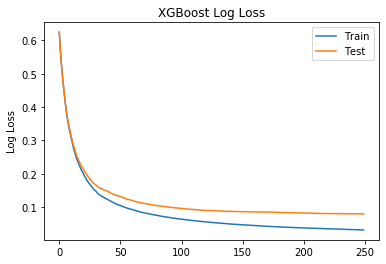

In [66]:
model = XGBClassifier(**{'colsample_bylevel': 0.7,
 'colsample_bynode': 0.2,
 'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'n_estimators': 250,
 'subsample': 1})
eval_set = [(X_train_tfidf, y_train), (X_test_tfidf, y_test)]
model.fit(X_train_tfidf, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose= 0)

predictions = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()